# BUSINESS UNDERSTANDING

This analysis aims to support lending organizations in making faster, data-driven loan approval decisions. Credit providers review loan applications regularly as part of their daily operations, and minimizing borrower defaults remains the core business goal, as inaccurate risk assessments result to financial losses, directly affecting business performance.

Financial loan services are used by companies across many industries, from banks and financial institutions to government lending programs. One of the primary objectives of these organizations is to reduce payment defaults and ensure individuals are repaying their loans as expected. To achieve this efficiently and systematically, many employ machine learning to predict which borrowers are at highest risk of default, allowing interventions to be targeted effectively.

The project involves building a machine-learning model that predicts the likelihood of loan default using borrower historical data such as income level, employment type, months employed, loan purpose, credit score, loan term and other factors. The final model is intended to act as a decision-support tool for Credit Risk Teams and Loan Approval Officers, helping them evaluate applications more consistently while maintaining responsible lending practices.

# PROBLEM STATEMENT

Credit providers regularly assess loan applications, but it is often not straightforward to know in advance which applicants will repay their loans and which ones may default. This uncertainty can lead to the approval of high-risk borrowers, resulting in financial losses when the loans are not repaid.  

To address this challenge, there is a need for a reliable ML model capable of accurately predicting whether a borrower is likely to default or not based on borrower information. Such a model can support lenders in making more consistent, reliable, and data-driven approval decisions,  helping to reduce default-related losses & promote responsible lending practices. 

# BUSINESS OBJECTIVE

### **Main Objective**
* To design a machine-learning model for credit risk assessment that supports faster, more consistent, and risk-aware loan approval decisions.
  
### **Specific Objectives**
* Assess borrower credit risk by estimating the probability of loan default using historical applicant data.
* Improve operational efficiency by automating parts of the loan assessment process.
* Ensure consistency and fairness in credit decisions through standardized, data-driven risk evaluations.
* Provide interpretable risk insights that allow credit providers to understand the factors driving each prediction.

# RESEARCH QUESTIONS

1. Which machine-learning model provides the most accurate and reliable predictions for loan default?
2. Which loan features (credit score, income, MonthsEmployed, Education, EmploymentType, loan amount, etc.) strongly influence loan default?
3. What evaluation metrics are most effective for assessing the performance of a loan default prediction model?
4. Is there class imbalance in the target column, and if so, what techniques can be used to improve the model’s performance?

# DATA UNDERSTANDING

The dataset used for this project is the [Loan Default Prediction Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default) from kaggle, and it contains of 255,347 loan records(rows) with 18 columns. These columns represent a combination of borrower information,  loan characteristics, and financial indicators.

**Target Variable**
1. **Default** (1 = loan defaulted, 0 = loan repaid). This is the variable the model will try to predict, making this a binary classification problem.

**Predictor Variables**
The dataset includes a diverse set of features that describe the borrower’s demographics, financial situation, credit behavior, and loan details. Examples include:

2. **Age**: The borrower’s age.
3. **Income:** Borrower's annual income.
4. **CreditScore:** The credit score of the borrower, measuring their creditworthiness.
5. **MonthsEmployed:** Number of months the borrower has been employed.
6. **NumCreditLines:** Number of credit accounts the borrower has opened.
7. **Education:** The borrower's level of education (High School, Bachelor’s, Master’s, PhD).
8. **EmploymentType:** Employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
9. **MaritalStatus:** If the borrower is Single, Married or Divorced.
10. **LoanAmount:** Amount of money being borrowed.
11. **InterestRate:** Interest rate charged for the loan.
12. **LoanTerm:** Duration of the loan in months.
13. **LoanPurpose:** Reason for taking the loan (Home, Business, Education, Auto, Other).
14. **HasCoSigner:** Whether the borrower has a co-signer.
15. **DTIRatio:** Debt-to-income ratio, indicating the borrower's debt compared to their income
16. **HasMortgage & HasDependents:** Whether the borrower has dependent or mortgage(Yes/No).



* The dataset has a Large Sample Size with over 255K rows, which is suitable for training complex models.

# DATA PREPARATION

In [1]:
# load the data
import pandas as pd
df=pd.read_csv("./Data/Loan_default.csv")
df.head(32)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [2]:
# check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

* The dataset has mixed data types, both numeric(int64 , float64) and categorical columns(object), requiring preprocessing (scaling numericals & onehot-encoding categoricals during modeling)

In [3]:
# check the shape of the datset
df.shape

(255347, 18)

In [4]:
# check for missing values
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# drop irrelevant columns
df= df.drop(columns="LoanID")

# EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## a) Bivariate Analysis

* Compare the relationship between predictive features and the target

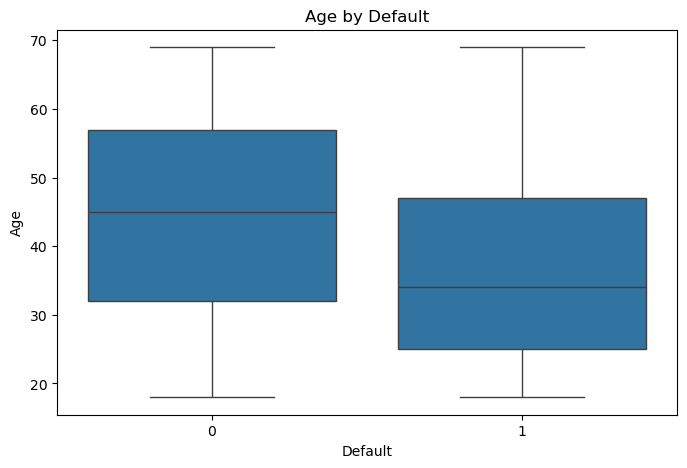

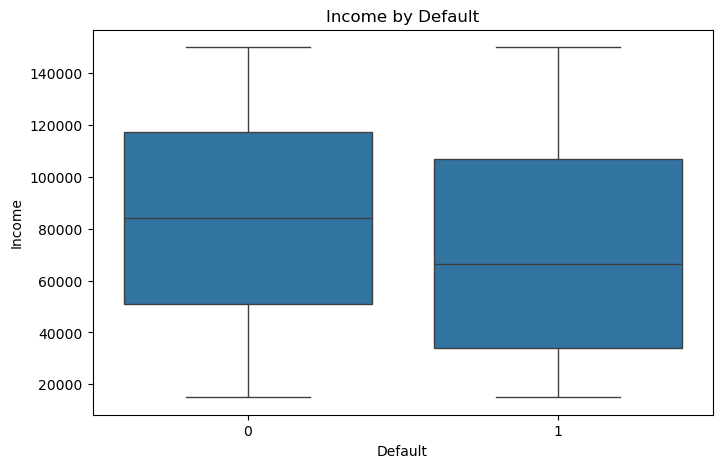

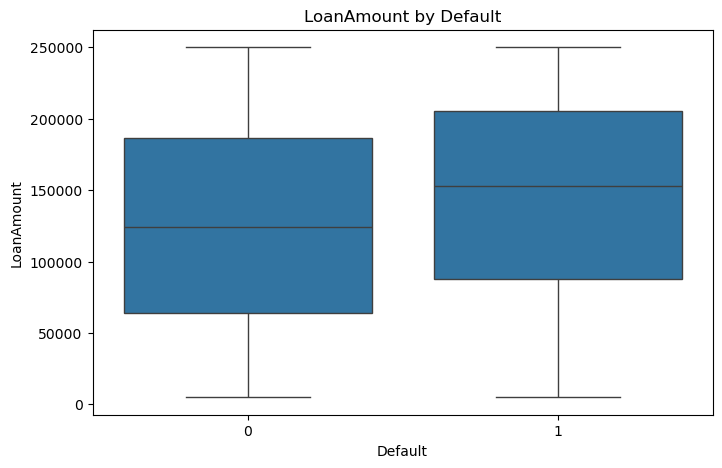

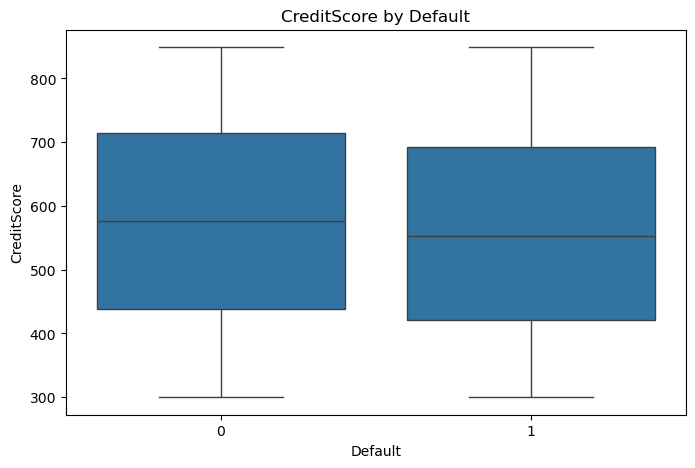

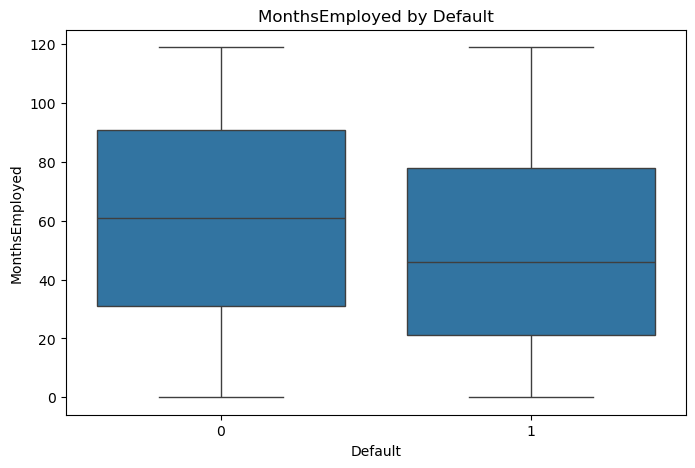

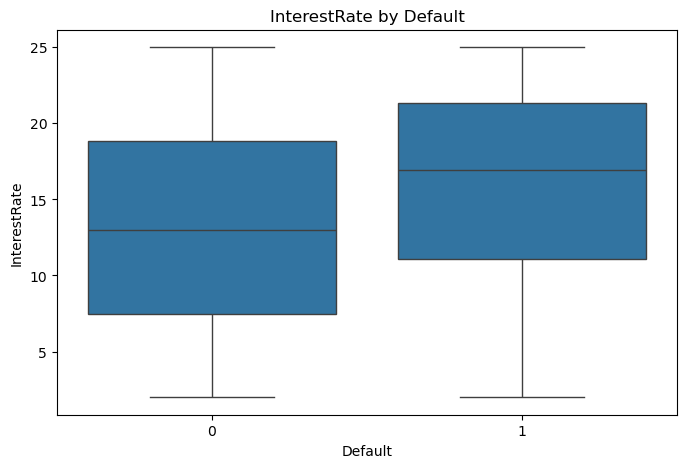

In [8]:
# Comparing numerical features against the target(Default)
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate']

for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Default', y=feature, data=df)
    plt.title(f'{feature} by Default')
    plt.show()


### **Observations**

1. Repayment behavior tends to improve as age increases;  older borrowers are likely to repay the loan compared to younger borrowers
2. Low-income borrowers generally show higher default rates compared to high-income borrowers.
3. Higher loan amounts are associated with an increased risk of default. 
4. Individuals with high credit scores tend to have reduced default rates.
5. Longer employment duration in months is associated with a lower likelihood of loan default
6. Higher interest rates are associated with an increased risk of loan default

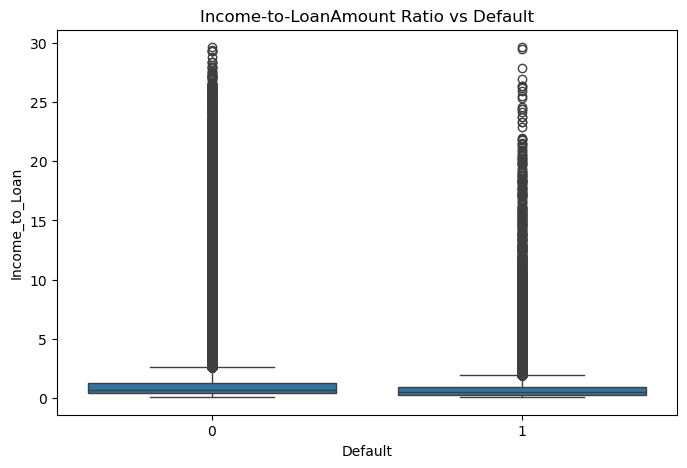

In [9]:
# Feature Engineering. Income-to-LoanAmount ratio
df['Income_to_Loan'] = df['Income'] / df['LoanAmount']

# Plot Income-to-LoanAmount ratio vs Default
plt.figure(figsize=(8,5))
sns.boxplot(x='Default', y='Income_to_Loan', data=df)
plt.title('Income-to-LoanAmount Ratio vs Default')
plt.show()

### **Observation**
Borrowers with lower income-to-loan ratios are more likely to default, while individuals with higher income-to-loan ratios show lower default risk.
 

## b) Correlation Analysis

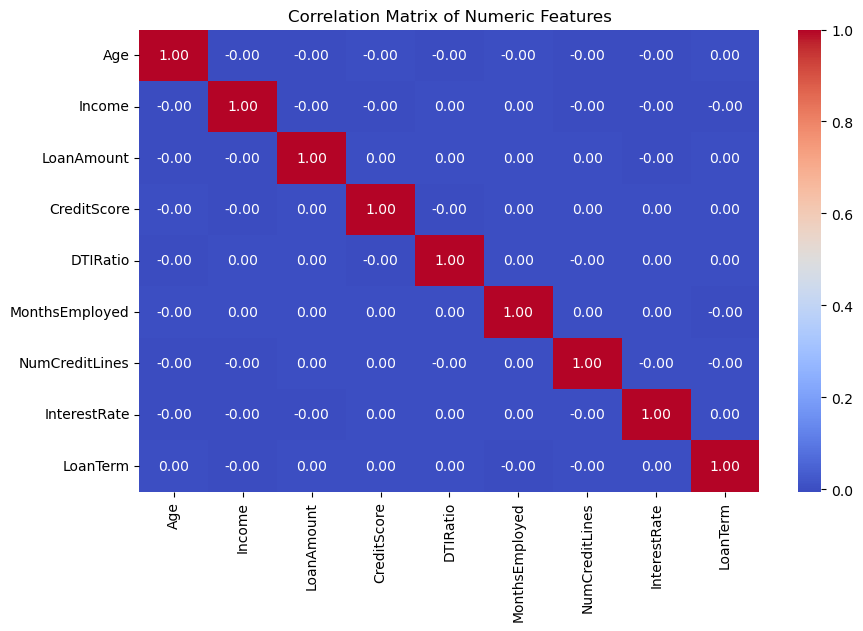

In [10]:
numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'DTIRatio', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm']

# Compute correlation matrix
corr = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### **Observation**
* Each feature is likely contributing independent information to the predictive models; no feature pairs show strong correlation, suggesting that multicollinearity is not of concern.

# MODELING

In [11]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  


In [12]:
# Import the neccessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
import pickle


In [13]:
# Check the distibution of the target column
df["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

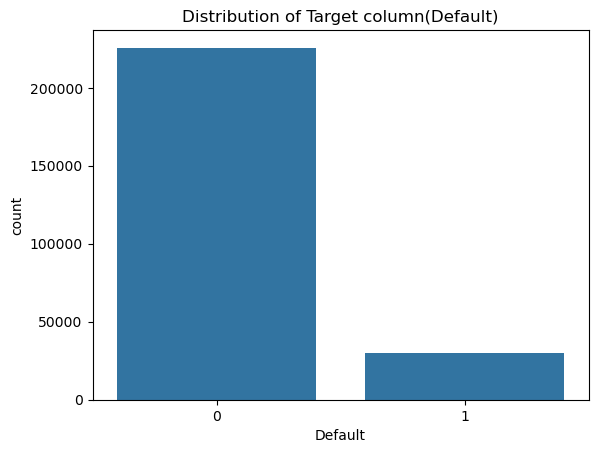

In [14]:
# plot
sns.countplot(data=df, x="Default")
plt.title("Distribution of Target column(Default)")
plt.show()

* Due to class imbalance, accuracy alone will not be a reliable metric. Other metrics like Precision, Recall, and F1-score will be used to evaluate the model's performance.
* SMOTE will be used to generate synthetic samples of the minority class, and class weights to be used in tree-based models to assign higher penalties for misclassifying defaults, ensuring the model focuses more on the minority class during training

* Since the dataset contains both numerical and categorical features, a preprocessing step will be applied to scale numerical variables and encode categorical variables using one-hot encoding. This ensures that all features are converted into a numeric format suitable for the machine learning models. 

In [15]:
# Separate the numeric and categorical features
numeric_features = [
    "Age", "Income", "LoanAmount", "CreditScore",
    "MonthsEmployed", "NumCreditLines", "InterestRate",
    "LoanTerm", "DTIRatio"
]

categorical_features = [
    "Education", "EmploymentType", "MaritalStatus",
    "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"
]

In [16]:
# Separate the target from the predictive features
X= df.drop("Default", axis=1)
y= df["Default"]

# Preprocessing(onehotencode categoricals & standardscale numericals)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Train test split( include stratify to help with class imbalance of the target column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



## a) **Logistic Regression as the baseline model**
* It handles linear relationships

In [18]:
# Build logistic regression pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)), 
    ("log_reg", LogisticRegression(max_iter=1000, # 1000 iterations allows the model enough time to learn properly without stopping too early.
                                   random_state=42))])

# Hyperparameter tuning
param_grid= {
    "log_reg__C": [0.01, 0.1, 1, 10],     # Controls the strength of regularization. 
    "log_reg__penalty": ["l1", "l2"],     # Specifies the type of regularization applied.
    "log_reg__solver": ["liblinear"]}     # Specifies the optimization algorithm used to train the model.

# GridSearch
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1)

# Train model
grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
best_model=grid_search.best_estimator_

# Make predictions
y_pred=best_model.predict(X_test)



C:\Users\ADMIN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(



### **Logistic Regression Pipeline and Hyperparameter grid Tuning**

* In this step, GridSearchCV is used to systematically test different combinations of Logistic Regression hyperparameters in order to identify the parameter setting that produces the best predictive performance. Hyperparameter tuning helps improve model generalization by balancing model complexity and overfitting.

* For the Logistic Regression baseline model, the hyperparameter grid focuses on tuning the strength and type of regularization, which directly influence how the model handles noisy/less informative features while maintaining stable optimization.

1. C (Regularization strength):
* The parameter C controls the strength of regularization. Smaller values of C apply stronger regularization, leading to simpler models that are less likely to overfit. Larger C values apply weaker regularization, allowing the model to fit the training data more closely.

2. Penalty (Regularization type):
* L1/Lasso regularization performs  feature selection by shrinking some coefficients exactly to zero, effectively removing less important or noisy features from the model.
* L2/Ridge regularization reduces overfitting by shrinking all coefficients toward zero without eliminating any features, ensuring that all variables remain part of the model.

3. Solver (Optimization algorithm):
* The solver helps the model find the best values for the model’s coefficients so that its predictions are as accurate as possible.
* The liblinear solver supports both L1 and L2 regularization, ensuring valid and stable optimization for the tested parameter combinations.

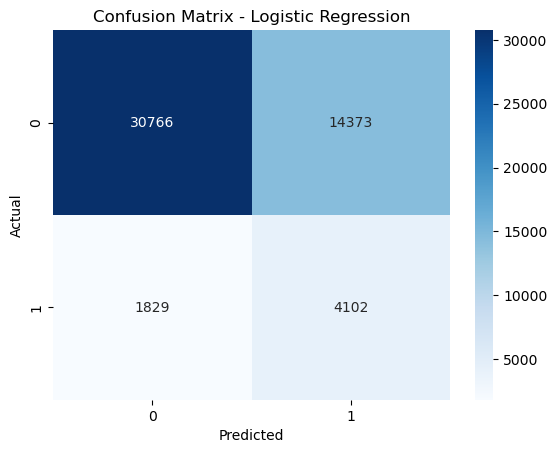


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.69      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070



In [19]:
# Evaluation

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    #xticklabels=["No Default", "Default"],
    #yticklabels=["No Default", "Default"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



### **Observations**
* 0.69 Recall for Default(Class 1)- The model correctly identifies 69% of borrowers who are at risk of defaulting.

* The baseline Logistic Regression model prioritizes recall for default cases, successfully identifying 69% of high-risk borrowers. 

##### **Confusion Matrix**
* About 30,766 loans were correctly predicted as not defaulting, showing that the model performs well for safe borrowers.
* Around 14,373 borrowers who would have repaid their loans were predicted as defaulters. This indicates a high false positive rate, which could lead to rejecting many creditworthy applicants.
* Approximately 4,102 defaulting borrowers were correctly identified, showing strong recall for defaulters, which is important for minimizing financial losses.
* About 1,829 defaulters were incorrectly predicted as non-defaulters, meaning the model still carries some risk of approving high-risk loans.

### **Insight**

* When predicting loan defaults, it is more important to correctly identify borrowers who are likely to default(high recall) so lenders can avoid financial losses.
* However, if the model predicts too many safe borrowers as risky(low precision), the organization may reject many potential customers who would have repaid their loans. 
* Therefore, while recall for defaulters helps minimize losses, extremely low precision can lead to missed revenue and unfair rejections.


## b) **Random Forest Model**

In [19]:
# RandomForest Pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(      
        class_weight="balanced",      # Helps with class imbalance
        random_state=42,
        n_jobs=-1
    ))
])

# Paramater grid
param_grid= {
    "rf__n_estimators": [200, 300],  # Specifies the number of trees in the forest
    "rf__max_depth": [None, 10, 20],  # Maximum depth of each Tree, Controls model complexity and overfitting
    "rf__min_samples_split": [2, 10],  #  Minimum number of samples required to split an internal node
    "rf__min_samples_leaf": [1, 5],    #   Minimum number of samples required to be at a leaf node
    "rf__max_features": ["sqrt", "log2"], # Number of features considered at each split, Introduces randomness and improves generalization
    "rf__criterion": ["gini", "entropy"]  # Measures the quality of a split, GridSearch will choose the one that maximizes F1-score
}

# RandomizedSearchCV to try many parameter combinations
random_search_rf = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_grid,
    scoring="f1",           # Balances precision and recall equally and Penalizes extreme imbalance
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    n_iter=20
)

# Train the model
random_search_rf.fit(X_train, y_train)
print(random_search_rf.best_params_)

# Get the best tuned model
best_rf_model = random_search_rf.best_estimator_

# Make Predictions
y_pred_rf = best_rf_model.predict(X_test)  # predicts decision defaulted or not defaulted
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Predicts confidence level. It gives the probability that a borrower will default



Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'rf__n_estimators': 200, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 5, 'rf__max_features': 'sqrt', 'rf__max_depth': 10, 'rf__criterion': 'gini'}


### **Random Forest Pipeline and Hyperparameter Grid**

* In this step, RandomizedSearchCV is used to test different combinations of Random Forest hyperparameters to identify the parameter settings that produce the best predictive performance. Hyperparameter tuning improves the model’s ability to generalize by controlling complexity, handling class imbalance, and reducing overfitting.

* The Random Forest model is set up as a pipeline with preprocessing steps and a Random Forest classifier. The hyperparameter grid focuses on parameters that control tree complexity, splitting rules, randomness, and overall stability.

1. **n_estimators** (Number of trees):
* Specifies how many decision trees the random forest will contain. More trees generally improve model stability, reduce variance, and help the model learn more robust patterns from the data.

2. **max_depth** (Maximum depth of trees):
* Controls how deep each decision tree can grow. Limiting depth prevents overfitting by stopping trees from modeling noise in the training data, while deeper trees can capture more complex patterns.

3. **min_samples_split** (Minimum samples to split a node) & min_samples_leaf (Minimum samples at a leaf):
* These parameters prevent trees from splitting on very small groups, which reduces the risk of learning noise. They balance bias and variance by allowing the model to learn meaningful patterns without overfitting.

4. **max_features** (Features considered at each split):
* Specifies how many features are randomly considered when looking for the best split. Introducing this randomness improves generalization and reduces correlation between trees.

5. **criterion** (Split quality measure):
* Determines how the model evaluates splits. Options are Gini (faster, efficient splits) and Entropy (more informative splits). The grid search chooses the one that maximizes the F1-score, balancing precision and recall.

6. **Class weighting and F1-score**:
* The class_weight="balanced" parameter ensures that the minority class is given more importance, helping the model detect high-risk borrowers. Using F1-score during tuning ensures the model balances recall (catching potential defaulters) and precision (avoiding unnecessary rejection of creditworthy applicants).



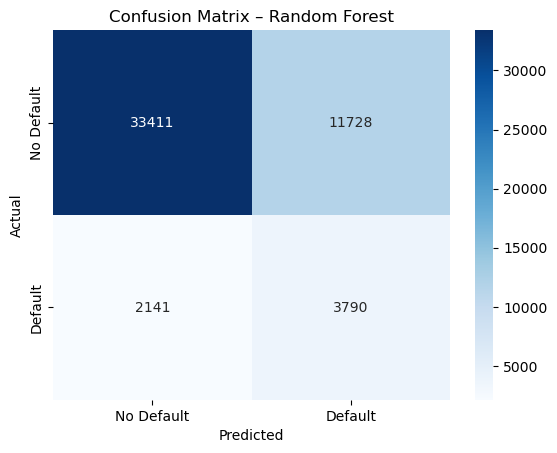

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     45139
           1       0.24      0.64      0.35      5931

    accuracy                           0.73     51070
   macro avg       0.59      0.69      0.59     51070
weighted avg       0.86      0.73      0.77     51070

Classification Report:

ROC-AUC Score: 0.755161823175846


In [24]:
# Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))
print("Classification Report:\n")

roc_auc = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", roc_auc)

In [25]:
# Save the model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)
          

### **Observation**

#### **Confusion Matrix**
- Approximately 33,411 loans were correctly predicted as not defaulting.
- Around 11,728 borrowers who would have repaid their loans were incorrectly predicted as defaulters, resulting in false positives.
- About 3,790 defaulting borrowers were accurately identified, which is crucial for minimizing financial losses.
- Approximately 2,141 defaulters were mistakenly predicted as non-defaulters, leading to the approval of high-risk loans.g high-risk loans.

## c) XGBoost Model

In [35]:
# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("xgb", XGBClassifier(
        objective="binary:logistic", # Specifies a binary classification problem
        eval_metric="logloss", # Log loss penalizes confident wrong predictions
        random_state=42,
        n_jobs=-1))])


In [36]:
# Hyperparameter Grid
param_dist_xgb={
    "xgb__n_estimators": [200,300],  # Number of trees
    "xgb__max_depth": [3, 5, 7],    # Maximum depth of each tree, controls model complexity and helps prevent overfitting
    "xgb__learning_rate": [0.01, 0.05, 0.1], # Step size shrinkage helps prevent overfitting
    "xgb__subsample": [0.8, 1.0],        # Helps reduce overfitting by introducing randomness
    "xgb__colsample_bytree": [0.8,1.0]}    # Improves generalization and speeds up training

# GridSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=20, 
    random_state=42,
    scoring="f1", # Balances recall & precision
    cv=5,        # Ensures model stability across different data splits
    n_jobs=-1,
    verbose=1)

# Train the model
random_search_xgb.fit(X_train, y_train)

# Best XGBoost Model
best_xgb_model = random_search_xgb.best_estimator_

print("Best parameters:")
print(random_search_xgb.best_params_)

# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters:
{'xgb__subsample': 0.8, 'xgb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.8}


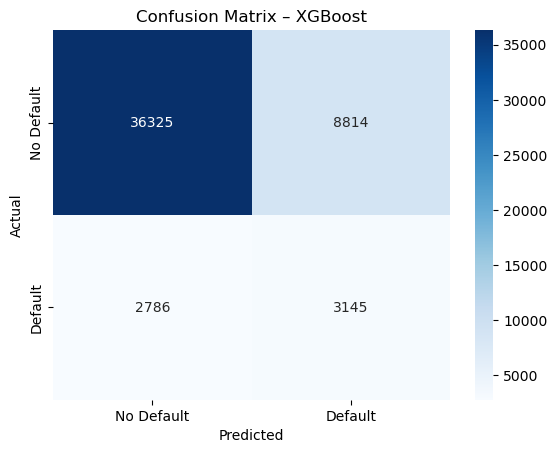

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     45139
           1       0.26      0.53      0.35      5931

    accuracy                           0.77     51070
   macro avg       0.60      0.67      0.61     51070
weighted avg       0.85      0.77      0.80     51070

Classification Report:

ROC-AUC Score: 0.7435092369414277


In [37]:
# Evaluation

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_xgb))
print("Classification Report:\n")

roc_auc = roc_auc_score(y_test, y_prob_xgb)
print("ROC-AUC Score:", roc_auc)

### **Observation**
#### **confusion matrix**

* About 36,325 loans were correctly predicted as not defaulting
* Around 8,814 borrowers who would have repaid their loans were predicted as defaulters, false positives.
* About 3,145 defaulting borrowers were correctly identified, which is important for minimizing financial losses.
* About 2,786 defaulters were incorrectly predicted as non-defaulters, approving high-risk loans.

In [38]:
# Save the model
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(best_xgb_model, file)

## d) **Feature importance**

In [24]:
# Access the trained Random Forest inside the pipeline
rf = best_rf_model.named_steps["rf"]

# Get feature names after preprocessing
feature_names = best_rf_model.named_steps["preprocessor"].get_feature_names_out()

# Create a Series with feature importances
importance = pd.Series(
    rf.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

#
importance.index = importance.index.str.replace(
    r"^(num__|cat__)", "", regex=True
)

# Display top 15 important features
print(importance.head(15))

Age                          0.270942
InterestRate                 0.186718
Income                       0.149865
MonthsEmployed               0.102314
LoanAmount                   0.096401
CreditScore                  0.039175
DTIRatio                     0.027775
NumCreditLines               0.011993
EmploymentType_Full-time     0.010499
LoanTerm                     0.009206
HasCoSigner_Yes              0.008298
HasCoSigner_No               0.007658
HasDependents_No             0.007558
HasDependents_Yes            0.007222
EmploymentType_Unemployed    0.007154
dtype: float64


* **Age, Interest Rate, Income, Months Employed and Loan Amount** are the most influential features that contributed to model’s predictions.

## c) **Models Performance Comparison**

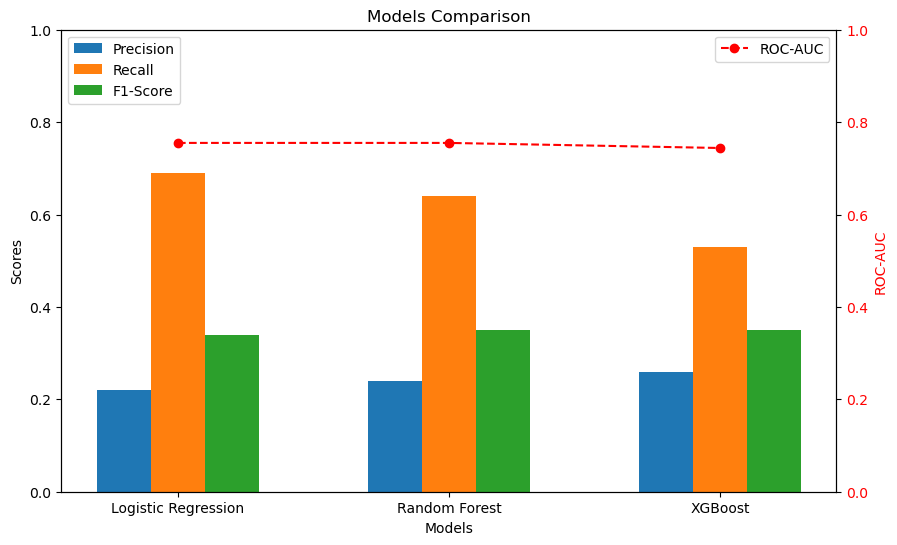

In [35]:

# Models
models = ["Logistic Regression", "Random Forest", "XGBoost"]

# Metrics for class 1 (defaulters)
precision = [0.22, 0.24, 0.26]
recall = [0.69, 0.64, 0.53]
f1_score = [0.34, 0.35, 0.35]
roc_auc = [0.755, 0.755, 0.744]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

# Plot bars
ax.bar(x - width, precision, width, label="Precision")
ax.bar(x, recall, width, label="Recall")
ax.bar(x + width, f1_score, width, label="F1-Score")

# Add ROC-AUC as line plot
ax2 = ax.twinx()
ax2.plot(x, roc_auc, color="red", marker="o", linestyle="--", label="ROC-AUC")
ax2.set_ylabel("ROC-AUC", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Labels, title, and legend
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0,1)
ax2.set_ylim(0,1)
ax.set_title("Models Comparison")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

The graph compares Logistic Regression, Random Forest, and XGBoost performances 

Recall:
Logistic Regression has the highest recall, meaning it is best at identifying borrowers who are likely to default. However, this comes at the cost of more  false alarms(false positives).

Precision:
XGBoost shows the highest precision; It identifies fewer defaulters, but with higher confidence. As a result it may miss some defaulters.

F1-score:
Random Forest achieves a more balanced F1-score, indicating a better balance between precision and recall.

ROC-AUC:
All three models have similar ROC-AUC scores, showing a good overall ability to distinguish between defaulters and non-defaulters.



# **CONCLUSIONS**
1. Key factors influencing loan default prediction
* Age, interest rate, income level, employment duration, and loan amount are the most influential predictors of default.

2. Best-performing machine learning model
* The Random Forest model provides the most balanced performance for credit risk assessment. It achieves a strong balance between identifying defaulters and correctly approving non-defaulters, making it suitable for real-world credit risk assessment.

4. Most effective evaluation metrics
* Accuracy alone is not sufficient for evaluating loan default models. Metrics such as recall, F1-score, and ROC-AUC, are more effective because they capture the cost of misclassifying both defaulters and non-defaulters.

5. Impact of class imbalance
* The target variable had a clear imbalance between non-default and defaults cases, which could bias the model toward predicting the majority class. To address this, techniques such as resampling methods(SMOTE) & class_weights for tree-based models helped improve the model’s ability to detect defaulters.

* This loan default prediction model is designed as a decision support tool rather than a fully automated approval system. It assists credit providers by identifying high-risk borrowers and providing probability-based risk assessments, while final decisions remain under human control.